In [1]:
import numpy as np
import pandas as pd

# Load the data from the CSV file, assuming the first column is unnamed
data_df = pd.read_csv("BIKED_datatypes.csv")
reduced_data = pd.read_csv("BIKED_reduced.csv")
# print(reduced_data.info())
# print(reduced.data['BIKESTYLE'].dtype)
Y = reduced_data.pop('BIKESTYLE')
print(" y data", type(Y))

reduced_data = reduced_data.drop( ['Unnamed: 0'], axis=1)
colstoOH = data_df[data_df['type'].isin(['str', 'object'])]['Unnamed: 0'].tolist()
# print(colstoOH)
colstoOH = [col for col in colstoOH if col in reduced_data.columns]
i=0
# print(reduced_data.info())
# Fill missing values in selected columns based on data types
for col in colstoOH:
        i=i+1
        if reduced_data[col].dtype in ['str', 'object']:
            reduced_data[col].fillna(reduced_data[col].mode().iloc[0], inplace=True)
        # elif reduced_data[col].dtype == 'bool':
        #     reduced_data[col].fillna(reduced_data[col].mode().iloc[0], inplace=True)
        # else:
        #     reduced_data[col].fillna(reduced_data[col].mean(), inplace=True)
numeric_columns = reduced_data.select_dtypes(include=['int64', 'float64']).columns

# Replace NULL (NaN) values with column-wise means
for col in numeric_columns:
    
    mean_value = reduced_data[col].mean()
    reduced_data[col].fillna(mean_value, inplace=True)
bool_columns = reduced_data.select_dtypes(include=['bool']).columns
# Replace NULL (NaN) values with column-wise means
for col in bool_columns:
    
    mode_value = reduced_data[col].mode()
    reduced_data[col].fillna(mode_value, inplace=True)

for col in colstoOH:
    reduced_data=pd.get_dummies(reduced_data, prefix_sep=' OHCLASS: ', columns=[col], dtype=np.bool_)
    try: 
        del df[str(col)+' OHCLASS: ']
    except:
        pass
print(reduced_data.info())
# OHdtypes=df.dtypes
# # count=0
    

C:\Users\utsav\AppData\Local\Temp\ipykernel_11908\3723420687.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


 y data <class 'pandas.core.series.Series'>


C:\Users\utsav\AppData\Local\Temp\ipykernel_11908\3723420687.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reduced_data[col].fillna(reduced_data[col].mode().iloc[0], inplace=True)
C:\Users\utsav\AppData\Local\Temp\ipykernel_11908\3723420687.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Columns: 2395 entries, SSSIDECX3 to bottle DOWNTUBE0 show OHCLASS: True
dtypes: bool(1336), float64(973), int64(86)
memory usage: 42.2 MB
None


In [2]:
reduced_data = reduced_data.replace({True: 1, False: 0})

C:\Users\utsav\AppData\Local\Temp\ipykernel_11908\741725745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reduced_data = reduced_data.replace({True: 1, False: 0})


In [3]:
max_val=reduced_data.max()
min_val=reduced_data.min()
tol=1e-10
X_scaled=(reduced_data-min_val)/(max_val-min_val+tol)
print(X_scaled)

      SSSIDECX3  SSSIDECX2  SSSIDECX1  SSSIDECY2  SSSIDECY1  STEMBENDS  \
0      0.115968   0.213580   0.240722   0.173913   0.295455        0.0   
1      0.115968   0.171084   0.199779   0.173913   0.295455        0.0   
2      0.115968   0.267053   0.292434   0.173913   0.295455        0.0   
3      0.115968   0.215305   0.242409   0.173913   0.295455        0.0   
4      0.115968   0.233025   0.259668   0.173913   0.295455        0.0   
...         ...        ...        ...        ...        ...        ...   
4507   0.092351   0.192410   0.220348   0.173913   0.295455        0.0   
4508   0.115968   0.126705   0.165066   0.228261   0.318182        1.0   
4509   0.115968   0.212326   0.239554   0.173913   0.295455        1.0   
4510   0.198449   0.286498   0.048858   0.173913   0.295455        1.0   
4511   0.115968   0.212326   0.239554   0.173913   0.295455        0.0   

      FRONTROTORBOLTS  Shoe up angle  Down tube front diameter  LRTHICK  ...  \
0                0.75       0.9

In [4]:
# !pip install pathlib

from pathlib import Path

#Take a dataframe of features and insert features into a baseline bikecad file to generate bcad files
#BikeCAD files are XML files with the .bcad extension

df = X_scaled
num = 10
sourcepath = "PlainRoadbikestandardized.txt"
targetpath = "UTSAV'S bcad files"

def genBCAD(df, sourcepath, targetpath):
    for modelidx in df.index[0:num]: #loop over the models in the dataframe
        count=0
        sourcefile = open(Path(sourcepath), 'r') 
        targetfile= open(Path(targetpath + str(modelidx) + ".bcad"), 'w')
        lines = sourcefile.readlines()
        linecount=0
        for line in lines: #Loop over the lines of the bcad file
            linecount+=1
            if linecount>4: #ignore first 4 lines of the bcad file
                param = find_between(line, "<entry key=\"", "\">")
                if param.endswith("mmInch"): #Manually set all units to mm
                    targetfile.writelines("<entry key=\""+param+"\">"+"1"+"</entry>\n")
                if param in df.columns: #if this line of the bcad file exists in the datafram column labels
                    if pd.isnull(df.at[modelidx,param]): #Don't want to insert nan values, leave blank instead
                        # targetfile.writelines("<entry key=\""+param+"\">"+"</entry>\n")
                        pass
                    elif type(df.at[modelidx,param])==np.bool_: #Bikecad wants "true" and "false" lower case
                        if df.at[modelidx,param]==True:
                            targetfile.writelines("<entry key=\""+param+"\">"+"true"+"</entry>\n")
                        else:
                            targetfile.writelines("<entry key=\""+param+"\">"+"false"+"</entry>\n")
                    # elif type(df.at[modelidx,param])==np.float64:
                    #     targetfile.writelines("<entry key=\""+param+"\">"+str(df.at[modelidx,param])+"</entry>\n")
                    elif type(df.at[modelidx,param])==np.float64 and df.at[modelidx,param].is_integer(): 
                        targetfile.writelines("<entry key=\""+param+"\">"+str(int(df.at[modelidx,param]))+"</entry>\n")
                    else:    #This is the default case, we insert the value into the bcad file
                        targetfile.writelines("<entry key=\""+param+"\">"+str(df.at[modelidx,param])+"</entry>\n")
    #                 df=df.drop(param,axis=1)
                    count+=1
                else:
                    targetfile.writelines(line)
            else:
                targetfile.writelines(line)
        
        sourcefile.close()
        targetfile.close()
        
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [5]:
genBCAD(df, sourcepath, targetpath)

(4512, 2395)
The shape of co-variance matrix =  (2395, 2395)


C:\Users\utsav\AppData\Local\Temp\ipykernel_11908\2285800359.py:18: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix,eigvals=(398,399)) # returns the values and vectors from co-var matrix, top two(398,399)


The shape of eigen vectors is  (2395, 2)
The updated shape of eigen vectors is (2, 2395)
The resultent new data points' shape is  (2, 2395) X (2395, 4512) = (2, 4512)
The shape of new data set is  (4512, 2)
   1st_principal  2nd_principal
0      -0.007464       0.005395
1      -0.021455      -0.023995
2       0.000034      -0.000030
3       0.018266      -0.009012
4      -0.064381       0.045876


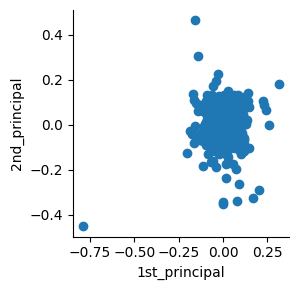

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.io import loadmat
from pathlib import Path
from sklearn.preprocessing import StandardScaler
X=X_scaled
standard_data = StandardScaler().fit_transform(X)
print(standard_data.shape)
# creating same data sample for co-variance matrix : A^T * A
sample_data = standard_data

# Matrix multiplication with numpy
covar_matrix = np.matmul(sample_data.T,sample_data)
print('The shape of co-variance matrix = ',covar_matrix.shape)

# working with eigen-vectors and eigen-values
from scipy.linalg import eigh # from scipy of linear algebra
values, vectors = eigh(covar_matrix,eigvals=(398,399)) # returns the values and vectors from co-var matrix, top two(398,399)
print('The shape of eigen vectors is ', vectors.shape)
vectors = vectors.T
print('The updated shape of eigen vectors is',vectors.shape)

# reducing the dimentions of 400-d data set into 2-d data set by the above eigen vector
new_coordinates = np.matmul(vectors,sample_data.T)
print('The resultent new data points\' shape is ', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

# appending labels with new data set of 2d projection
new_coordinates = new_coordinates.T

print('The shape of new data set is ',new_coordinates.shape)

# Creating the data frame
matrix_df = pd.DataFrame(data= new_coordinates,columns=('1st_principal','2nd_principal'))
print(matrix_df.head(5))

sn.FacetGrid(matrix_df).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# using SKlearn importing PCA


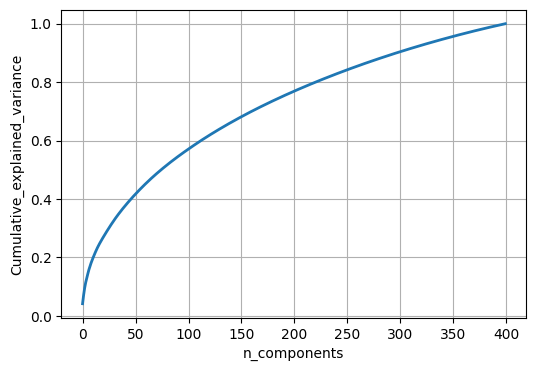

In [7]:
from sklearn import decomposition
pca = decomposition.PCA()

# PCA for dimensionality redcution (non-visualization)

pca.n_components = 400
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# directly entering parameters 


shape of pca_reduced data =  (4512, 2)


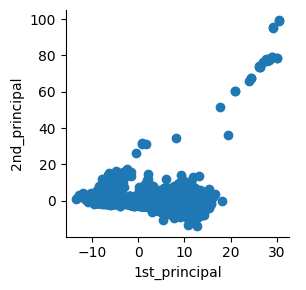

In [8]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print('shape of pca_reduced data = ',pca_data.shape)

# Data massaging - adding label colomn to the reduced matrix
# pca_data = np.vstack((pca_data.T,y)).T

# dataframing and plotting the pca data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal'))
sn.FacetGrid(pca_df).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

#%%--t-SNE


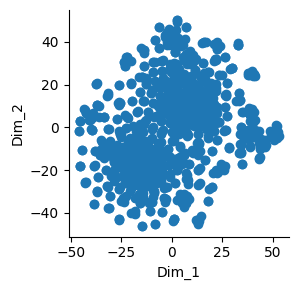

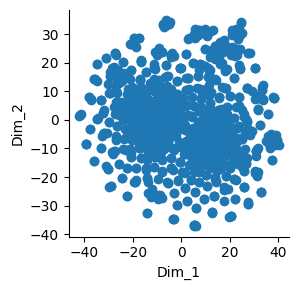

In [9]:
from sklearn.manifold import TSNE

# picking 1000 datapoints
data_1000 = standard_data[0:1000,:]
# label_1000 = y[0:1000]

# designing model with default values perplexity = 30, n_iteration = 1000
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)

# tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2'))
sn.FacetGrid(tsne_df).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

# Designing model with perpelexity = 50

model = TSNE(n_components=2,perplexity=50,random_state=0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2'))
sn.FacetGrid(tsne_df).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

# building models with whole data set


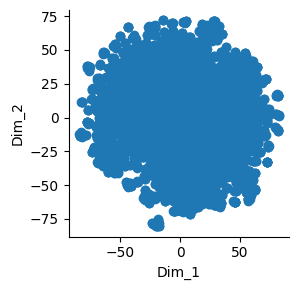

In [10]:
data_5k = standard_data[0:5000,:]
# label_5k = y[0:5000]

model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_5k)
# tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2'))
sn.FacetGrid(tsne_df).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

# Data modeling with whole Training data set and 5000 


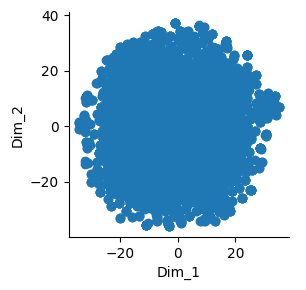

In [11]:
model =  TSNE(n_components=2,random_state=0,perplexity=40,n_iter=500)
tsne_data = model.fit_transform(data_5k)

tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2'))
sn.FacetGrid(tsne_df).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [12]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [13]:
class_names=['ROAD', 'DIRT_JUMP', 'POLO', 'BMX', 'MTB', 'TOURING', 'TRACK',
       'CRUISER', 'COMMUTER', 'CITY', 'CYCLOCROSS', 'OTHER', 'TRIALS',
       'CHILDRENS', 'TIMETRIAL', 'CARGO', 'HYBRID', 'GRAVEL', 'FAT']
print(type(Y))
Y=Y.to_numpy()
print(type(Y))
Y = np.array([class_names.index(value) for value in Y])
print(Y)
input_layer_size  = 2395 # 28x28 Input Images of Digits
hidden_layer1_size =  500 # 50 hidden units
hidden_layer2_size = 128 # 50 hidden units
hidden_layer3_size = 50
num_labels = 19  

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0 1 2 ... 0 0 0]


In [14]:
def sigmoidGradient(z):
    """
    Computes the gradient of the sigmoid function evaluated at z. 
    
    Parameters
    ----------
    z : array_like : A vector or matrix as input to the sigmoid function. 
    
    Returns
    --------
    g : array_like : Gradient of the sigmoid function. Has the same shape as z. 
    
    """

    # ============================================================

    sigmoid_z = 1.0 / (1.0 + np.exp(-z))
    
    # Compute the sigmoid gradient
    g = sigmoid_z * (1 - sigmoid_z)
    # =============================================================
    return g

In [15]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    """
    Randomly initialize the weights of a layer in a neural network.
    
    Parameters
    ----------
    L_in : int : Number of incomming connections.
    
    L_out : int : Number of outgoing connections. 
    
    epsilon_init : float, optional : Range of values which the weight can take from a uniform distribution.
    
    """
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    # print("hi")
    return W

In [16]:
#randomly initialise weights for two different layers
initial_w1 = randInitializeWeights(2395, 500)
initial_w2 = randInitializeWeights(500,128)
initial_w3 = randInitializeWeights(128,50)
initial_w4 = randInitializeWeights(50,19)
# print(initial_w2)
# Unroll parameters into a single array
from scipy.special import softmax
initial_nn_params = np.concatenate([initial_w1.ravel(), initial_w2.ravel(), initial_w3.ravel(),initial_w4.ravel()], axis=0)

In [17]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer1_size,
                   hidden_layer2_size,
                   num_labels,
                   X, y, lambda_=0.1):
    """
    Implements the neural network cost function and gradient for a two layer neural 
    network which performs classification. 
    
    Parameters
    ----------
    nn_params : array_like
        The parameters for the neural network which are "unrolled" into 
        a vector.
    
    input_layer_size : int
        Number of features for the input layer. 
    
    hidden_layer1_size : int
        Number of hidden units in the second layer.
        
    hidden_layer2_size : int
        Number of hidden units in the third layer.
    
    num_labels : int
        Total number of labels, or equivalently number of units in output layer. 
    
    X : array_like
        Input dataset. A matrix of shape (m x input_layer_size).
    
    y : array_like
        Dataset labels. A vector of shape (m,).
    
    lambda_ : float, optional
        Regularization parameter.
 
    Returns
    -------
    J : float : The computed value for the cost function at the current weight values.
    
    grad : array_like : An "unrolled" vector of the partial derivatives of the concatenatation of
                        neural network weights w1 and w2.
    """
    
    # Reshape nn_params back into the parameters w1 and w2, the weight matrices
    # for our 2 layer neural network
    w1 = np.reshape(nn_params[:hidden_layer1_size * (input_layer_size + 1)],
                        ((input_layer_size + 1),hidden_layer1_size))

    w2 = np.reshape(nn_params[hidden_layer1_size * (input_layer_size + 1):hidden_layer1_size * (input_layer_size + 1) +
                              hidden_layer2_size * (hidden_layer1_size + 1)], ((hidden_layer1_size + 1),hidden_layer2_size))
    
    w3 = np.reshape(nn_params[hidden_layer1_size * (input_layer_size + 1)+ hidden_layer2_size* (hidden_layer1_size + 1):],
                        ((hidden_layer2_size + 1), num_labels))
    w1=np.transpose(w1)
    w2=np.transpose(w2)
    w3=np.transpose(w3)
    # Setup some useful variables
    m = X.shape[0]
    new_unrolled_w=np.concatenate([(np.transpose(w1[:,1:])).ravel(),(np.transpose(w2[:,1:])).ravel(),(np.transpose(w3[:,1:])).ravel()])
    X=np.concatenate((np.ones((m,1)),X),axis=1)
    n=X.shape[1]
    new_y=np.zeros((num_labels,m))
    # You need to return the following variables correctly 
    J = 0
    w1_grad = np.zeros(w1.shape)
    w2_grad = np.zeros(w2.shape)
    w3_grad = np.zeros(w3.shape)
    for i in range(0,m):
        new_y[y.item(i),i] = 1
    delta1_grad = np.zeros(w1.shape)
    delta2_grad = np.zeros(w2.shape)
    delta3_grad = np.zeros(w3.shape)
    for i in range(0, m):
        a1 = X[i,:][np.newaxis]
        a2 = sigmoid(np.dot(w1,np.transpose(a1)))
        a2 = np.concatenate((np.ones((1,1)),a2))
        a3 = sigmoid(np.dot(w2,a2))
        a3 = np.concatenate((np.ones((1,1)),a3))
        a4 = softmax(np.dot(w3,a3))

        delta4 = a4 - np.transpose(new_y[:,i][np.newaxis])
    	# delta4 = a4 - np.transpose(new_y[:, i][np.newaxis])
        delta = np.dot((np.transpose(w3)), delta4)
        delta3 = np.multiply(delta[1:], sigmoidGradient(np.dot(w2, a2)))
        delta = np.dot((np.transpose(w2)), delta3)
        delta2 = np.multiply(delta[1:], sigmoidGradient(np.dot(w1, np.transpose(a1))))

        delta1_grad = delta1_grad + np.dot(delta2, a1)
        delta2_grad = delta2_grad + np.dot(delta3, np.transpose(a2))
        delta3_grad = delta3_grad + np.dot(delta4, np.transpose(a3))
    first_layer_activation = X;
#Second layer activation function
    second_layer_activation = sigmoid(np.dot(w1,np.transpose(X)))
# appending bias unit
    second_layer_activation = np.concatenate((np.ones((1,m)),second_layer_activation))
#Activation in third layer
    third_layer_activation =  sigmoid(np.dot(w2,second_layer_activation))
#appending bias unit
    third_layer_activation = np.concatenate((np.ones((1,m)),third_layer_activation))
#Hypothesis function
    # y_encoded = np.eye(num_labels)[y]
    # J = (-1 / m) * np.sum(y_encoded * np.log(a4) + (1 - y_encoded) * np.log(1 - a4))

    # # Add regularization term
    # reg_term = (lambda_ / (2 * m)) * (np.sum(Theta1[:, 1:] ** 2) + np.sum(Theta2[:, 1:] ** 2) + np.sum(Theta3[:, 1:] ** 2))
    # J = J + reg_term
    hypFunction = sigmoid(np.dot(w3,third_layer_activation))

    first_half = np.sum(np.multiply(new_y,np.log(hypFunction)))
    second_half = np.sum(np.multiply((1-new_y),np.log(1-hypFunction)))
#Calculating cost
    J = ((-1.0/m)*(first_half+second_half)) + (lambda_/(2*m) *(np.sum(np.multiply(new_unrolled_w,new_unrolled_w))));
    w1_grad = (1/m) * delta1_grad
    w2_grad = (1/m) * delta2_grad
    w3_grad = (1/m) * delta3_grad
#gradient of 3 layers
    w1_grad[:,1:] = w1_grad[:,1:] + (w1[:,1:]) * (lambda_/m)
    w2_grad[:,1:] = w2_grad[:,1:] +  (w2[:,1:]) * (lambda_/m)
    w3_grad[:,1:] = w3_grad[:,1:] +  (w3[:,1:]) * (lambda_/m)
#concatenate 3 layers gradient to one vector
    grad = np.concatenate([(np.transpose(w1_grad)).ravel(),(np.transpose(w2_grad)).ravel(),(np.transpose(w3_grad)).ravel()])
    # ================================================================================================
     
    
    # Add regularization term
    

    # Backpropogation

    
    # Add regularization to gradient

    
    
    #=======================================================================================================
    print(J)
    return J, grad

In [18]:
def nnCostFunction_vectorized(nn_params, input_layer_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size, num_labels, X, y, lambda_=0.1):
    m = y.size
    
    # Reshape nn_params back into the parameters w1, w2, w3, and w4
    w1_size = (hidden_layer1_size, input_layer_size + 1)
    w2_size = (hidden_layer2_size, hidden_layer1_size + 1)
    w3_size = (hidden_layer3_size, hidden_layer2_size + 1)
    w4_size = (num_labels, hidden_layer3_size + 1)

    w1 = np.reshape(nn_params[:np.prod(w1_size)], w1_size)
    w2 = np.reshape(nn_params[np.prod(w1_size):np.prod(w1_size) + np.prod(w2_size)], w2_size)
    w3 = np.reshape(nn_params[np.prod(w1_size) + np.prod(w2_size):np.prod(w1_size) + np.prod(w2_size) + np.prod(w3_size)], w3_size)
    w4 = np.reshape(nn_params[np.prod(w1_size) + np.prod(w2_size) + np.prod(w3_size):], w4_size)

    # Forward propagation
    a1 = np.concatenate((np.ones((m, 1)), X), axis=1)
    z2 = np.dot(a1, w1.T)
    a2 = np.concatenate((np.ones((m, 1)), sigmoid(z2)), axis=1)
    z3 = np.dot(a2, w2.T)
    a3 = np.concatenate((np.ones((m, 1)), sigmoid(z3)), axis=1)
    z4 = np.dot(a3, w3.T)
    a4 = np.concatenate((np.ones((m, 1)), sigmoid(z4)), axis=1)
    z5 = np.dot(a4, w4.T)
    a5 = sigmoid(z5)

    # Compute cost
    y_encoded = np.eye(num_labels)[y]
    J = (-1 / m) * np.sum(y_encoded * np.log(a5) + (1 - y_encoded) * np.log(1 - a5))

    # Add regularization term
    reg_term = (lambda_ / (2 * m)) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2) + np.sum(w3[:, 1:] ** 2) + np.sum(w4[:, 1:] ** 2))
    J = J + reg_term

    # Backpropagation
    delta5 = a5 - y_encoded
    delta4 = np.dot(delta5, w4)[:, 1:] * sigmoidGradient(z4)
    delta3 = np.dot(delta4, w3)[:, 1:] * sigmoidGradient(z3)
    delta2 = np.dot(delta3, w2)[:, 1:] * sigmoidGradient(z2)

    # Gradients
    Delta4 = np.dot(delta5.T, a4)
    Delta3 = np.dot(delta4.T, a3)
    Delta2 = np.dot(delta3.T, a2)
    Delta1 = np.dot(delta2.T, a1)

    w1_grad = Delta1 / m
    w2_grad = Delta2 / m
    w3_grad = Delta3 / m
    w4_grad = Delta4 / m

    # Regularization for gradients
    w1_grad[:, 1:] = w1_grad[:, 1:] + (lambda_ / m) * w1[:, 1:]
    w2_grad[:, 1:] = w2_grad[:, 1:] + (lambda_ / m) * w2[:, 1:]
    w3_grad[:, 1:] = w3_grad[:, 1:] + (lambda_ / m) * w3[:, 1:]
    w4_grad[:, 1:] = w4_grad[:, 1:] + (lambda_ / m) * w4[:, 1:]

    # Unroll gradients
    grad = np.concatenate((w1_grad.ravel(), w2_grad.ravel(), w3_grad.ravel(), w4_grad.ravel()))
    print(J)
    return J, grad


In [19]:
def nnCostFunction_vectorized(nn_params, input_layer_size, hidden_layer1_size, hidden_layer2_size, hidden_layer3_size, num_labels, X, y, lambda_=0.1):
    m = y.size
    
    # Reshape nn_params back into the parameters w1, w2, w3, and w4
    w1_size = (hidden_layer1_size, input_layer_size + 1)
    w2_size = (hidden_layer2_size, hidden_layer1_size + 1)
    w3_size = (hidden_layer3_size, hidden_layer2_size + 1)
    w4_size = (num_labels, hidden_layer3_size + 1)

    w1 = np.reshape(nn_params[:np.prod(w1_size)], w1_size)
    w2 = np.reshape(nn_params[np.prod(w1_size):np.prod(w1_size) + np.prod(w2_size)], w2_size)
    w3 = np.reshape(nn_params[np.prod(w1_size) + np.prod(w2_size):np.prod(w1_size) + np.prod(w2_size) + np.prod(w3_size)], w3_size)
    w4 = np.reshape(nn_params[np.prod(w1_size) + np.prod(w2_size) + np.prod(w3_size):], w4_size)

    # Forward propagation
    a1 = np.concatenate((np.ones((m, 1)), X), axis=1)
    z2 = np.dot(a1, w1.T)
    a2 = np.concatenate((np.ones((m, 1)), sigmoid(z2)), axis=1)
    z3 = np.dot(a2, w2.T)
    a3 = np.concatenate((np.ones((m, 1)), sigmoid(z3)), axis=1)
    z4 = np.dot(a3, w3.T)
    a4 = np.concatenate((np.ones((m, 1)), sigmoid(z4)), axis=1)
    z5 = np.dot(a4, w4.T)
    a5 = sigmoid(z5)

    # Compute cost
    y_encoded = np.eye(num_labels)[y]
    J = (-1 / m) * np.sum(y_encoded * np.log(a5) + (1 - y_encoded) * np.log(1 - a5))

    # Add regularization term
    reg_term = (lambda_ / (2 * m)) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2) + np.sum(w3[:, 1:] ** 2) + np.sum(w4[:, 1:] ** 2))
    J = J + reg_term

    # Backpropagation
    delta5 = a5 - y_encoded
    delta4 = np.dot(delta5, w4)[:, 1:] * sigmoidGradient(z4)
    delta3 = np.dot(delta4, w3)[:, 1:] * sigmoidGradient(z3)
    delta2 = np.dot(delta3, w2)[:, 1:] * sigmoidGradient(z2)

    # Gradients
    Delta4 = np.dot(delta5.T, a4)
    Delta3 = np.dot(delta4.T, a3)
    Delta2 = np.dot(delta3.T, a2)
    Delta1 = np.dot(delta2.T, a1)

    w1_grad = Delta1 / m
    w2_grad = Delta2 / m
    w3_grad = Delta3 / m
    w4_grad = Delta4 / m

    # Regularization for gradients
    w1_grad[:, 1:] = w1_grad[:, 1:] + (lambda_ / m) * w1[:, 1:]
    w2_grad[:, 1:] = w2_grad[:, 1:] + (lambda_ / m) * w2[:, 1:]
    w3_grad[:, 1:] = w3_grad[:, 1:] + (lambda_ / m) * w3[:, 1:]
    w4_grad[:, 1:] = w4_grad[:, 1:] + (lambda_ / m) * w4[:, 1:]

    # Unroll gradients
    grad = np.concatenate((w1_grad.ravel(), w2_grad.ravel(), w3_grad.ravel(), w4_grad.ravel()))
    print(J)
    return J, grad


In [20]:



lambda_ = 0.1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction_vectorized(p, input_layer_size, # p == nn_param
                                        hidden_layer1_size,hidden_layer2_size,hidden_layer3_size,
                                        num_labels, X, Y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options={'maxfun': 2250})

13.124103751756154
13.124102796258411
13.124103094007856
4.312334377985549
4.312334186893017
4.312334357522129
4.312334235749728
3.602338407670839
3.3110528582292256
3.3110527537016288
3.31105284788475
3.047589932425546
3.0475899268209767
3.047589930443487
3.0129075682042177
3.0129075670701813
3.012907567593304
3.00614751453361
3.006147513929866
3.0061475141673877
3.0061475144146517
3.006147514466191
3.0021351974723975
3.00213519562129
3.002135196140939
3.0021351964068077
3.0015635932632576
3.0015635926668294
3.0015635925292488
3.001563592313578
3.000772674906718
3.00077267428786
3.0007726742706415
3.000772674623827
3.000071593996132
3.000071593710527
3.0000715937278404
3.0000715930968225
3.000071593023988
3.0000715922263783
3.0000715763273913
3.0122286679382912
2.9947695491450563
2.9947695389082334
2.9947695414802626
2.9947694302289825
3.0659785483059494
2.993125400487371
2.9868295450852225
2.986829497210155
2.986815959807956
2.9973988288695517
2.964679730568848
2.964679582049187
2.96

In [21]:
res
# get the solution of the optimization
nn_params = res.x #Row vector containing weight values for every layer of your implemented neural network
# import numpy as np

# Reshape the parameters for each layer
w1 = np.reshape(nn_params[:hidden_layer1_size * (input_layer_size + 1)],
                (hidden_layer1_size, (input_layer_size + 1)))

w2 = np.reshape(nn_params[hidden_layer1_size * (input_layer_size + 1):hidden_layer1_size * (input_layer_size + 1) +
                  hidden_layer2_size * (hidden_layer1_size + 1)],
                  (hidden_layer2_size, (hidden_layer1_size + 1)))

w3 = np.reshape(nn_params[hidden_layer1_size * (input_layer_size + 1) + hidden_layer2_size * (hidden_layer1_size + 1):
                  hidden_layer1_size * (input_layer_size + 1) + hidden_layer2_size * (hidden_layer1_size + 1) +
                  hidden_layer3_size * (hidden_layer2_size + 1)],
                  (hidden_layer3_size, (hidden_layer2_size + 1)))

w4 = np.reshape(nn_params[hidden_layer1_size * (input_layer_size + 1) + hidden_layer2_size * (hidden_layer1_size + 1) +
                  hidden_layer3_size * (hidden_layer2_size + 1):],
                  (num_labels, (hidden_layer3_size + 1)))

# Forward propagation
def predict(w1, w2, w3, w4, X):
    if X.ndim == 1:
        X = X[None]

    m = X.shape[0]

    # Forward pass through the network
    a0 = np.concatenate([np.ones((m, 1)), X], axis=1)
    z1 = a0 @ w1.T
    a1 = sigmoid(z1)
    a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)
    z2 = a1 @ w2.T
    a2 = sigmoid(z2)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
    z3 = a2 @ w3.T
    a3 = sigmoid(z3)
    a3 = np.concatenate([np.ones((m, 1)), a3], axis=1)
    z4 = a3 @ w4.T
    a4 = softmax(z4)
    h = a4

    # Apply the softmax function to get class probabilities
    exp_scores = np.exp(a4)
    p = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Return the predicted class labels based on the highest probability
    predicted_labels = np.argmax(p, axis=1)

    return predicted_labels

# Example usage
pred = predict(w1, w2, w3, w4, X)
print('Training Set Accuracy: %f' % (np.mean(pred == Y) * 100))


Training Set Accuracy: 99.977837
